# Data Cleaning

## Andrew Grofe

## A: Research Question

Does geographic location or time zone and the amount of bandwidth used per year affect the total outage time and number of customer support contacts?

This research question is designed to help the business determine if more cell towers are needed in different parts of the country to improve the overall quality of service being provided.

## B: Data Descriptions

Created in excel table to better organize the data.

## C1: Plan for cleaning the data set

In order to properly inspect the data after importing from the CSV file, I will create a DataFrame to more easily assess the quality. First, using the ‘.info()’ function, I will be able to view a list of all the columns in the DataFrame and assess if they are an appropriate type of data for what they represent. I will also be able to determine if any NULL values are in the data set by referring to the ‘Non-Null Count’ column displayed by df.info(). In a later part of this assignment, I will determine what should be done to accommodate the null values if they are present.

After taking a broad view of the data in the before mentioned step, I will look at each column of the DataFrame individually to assess whether or not anomalies exist. For example, the first three columns (‘CaseOrder’, ‘Customer_id’, and ‘Interaction’) should all be unique. For each of these columns I will use the ‘.unique()’ function to ensure there are 10,000 unique values. This could also be done with ‘.describe()’ or ‘.value_counts().count()’, but I will use the unique function because it is what was taught in the DataCamp courses.

Another column of interest after an initial inspection would be the state column. I will use the ‘str.len()’ function to calculate the max and min of the data entries. For consistency, both should result in ‘2.’ There should not be any state names written out (i.e. Alaska should be AK) and abbreviations should be used throughout the whole data set. It will not be the max / min length of the inputs, but this should be done for all columns to make sure data is input in the correct format and is consistent throughout the DataFrame.

Lastly I plan to use the ‘.describe()’ and ‘.value_counts()’ functions for the remaining columns to better assess if there is data that is incorrect or irrelevant. With these functions I can also observe if there are any columns where the data could be standardized so that it is easier to analyze and draw insights from.

#### Regarding Outliers

In order to inspect potential outliers in the data set, I will use the inner-quartile range method that was found (IQR) in reference (4) of section G in this document. This method determines outliers that are 1.5 times below the 25th percentile, and 1.5 times above the 25th percentile. I will create a method to reuse for all quantitative data sets in the provided data. For qualitative data, I will simply check for logical answers or valid inputs for the column.\

## C2: Justification of Plan

With the data dictionary that was provided alongside the data set, it will be easier to determine if things accurately represent the data they are intended to, if it is consistent, and if there are any anomalies within the data. The approach I mentioned above starts with a “bird’s eye view” of the data for an initial inspection to look at everything holistically. It is then broken down into more defined inspection by looking at each column individually. The ‘.describe()’ function will provide insights into the quantitative data including the mean, standard deviation, and mins and maxes of the data. The ‘.value_counts()’ will provide insights into more qualitative data to see what types of data exists, and how many times specific data is used in that column. It should be noted that ‘.value_counts()’ will be used on some quantitative data sets to more easily see the values in the data (i.e. # of times someone contacted customer support will be easier to assess in groupings, rather than quartiles and with a standard deviation).


## C3: Justification for Programming Languages / Packages

I chose to use python for this assignment and will likely use it for all future assignments because I have previous exposure to using it in undergraduate courses. Personally, this will make it easier to complete the assignments and will be a great refresher for me since it has been 5+ years since I used the language.

As a whole, python is a simple language that is widely used for data analysis and data cleaning. It allows you to create your own scripts to inspect and manipulate data for analysis with ease.

For this specific assignment I will be using several different packages including pandas, numpy, and sklearn. Pandas allows us to create a dataframe that allows us to easily store and output data from a CSV file in a more readable manner. Within this package, we are also able to use specific functions that allow us to transform and clean the data. The numpy package provides help with any mathematical functions that will be needed in order to assess the data. Sklearn will allow us to use the PCA (principal-component analysis) functions to further assess the data later in this assignment.


## C4: Annotated code for assessing the data

Please see uploaded file: ‘D206 Performance Assessment Cleaning Data.ipymb’


In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats

# Creating the data frame and importing the provided churn data set
df = pd.read_csv(r"C:\Users\agrof\OneDrive\Documents\churn_raw_data.csv", sep = ",",index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education             10

In [2]:
# Looking at data frame form "afar" to inspect the data holistically
pd.set_option("display.max_columns", None)
df

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3.0,NaN,"Some College, Less than 1 Year",Retired,55723.74,Married,Male,No,9.265392,12,2,0,NaN,Month-to-month,Yes,Yes,DSL,NaN,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.828800,6511.253000,3,2,3,3,4,3,2,3
9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4.0,48.0,Regular High School Diploma,Part Time,NaN,Divorced,Male,No,8.115849,15,2,0,NaN,Two Year,No,No,Fiber Optic,NaN,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,208.856400,5695.952000,4,5,5,4,4,5,2,5
9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,NaN,NaN,Nursery School to 8th Grade,Full Time,NaN,Never Married,Female,No,4.837696,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),NaN,168.220900,4159.306000,4,4,4,4,4,4,4,5
9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,35575,Urban,America/New_York,Water engineer,1.0,39.0,Bachelor's Degree,Full Time,16667.58,Separated,Male,No,12.076460,14,1,0,No,Two Year,No,Yes,Fiber Optic,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.628600,6468.457000,4,4,6,4,3,3,5,4


In [3]:
# Checking to ensure each case order is unique, should result in 10,000
m = len(pd.unique(df['CaseOrder']))
print(m)

10000


In [4]:
# Checking to ensure each customer_id is unique, should result in 10,000
n = len(pd.unique(df['Customer_id']))
print(n)

10000


In [5]:
# Checking to ensure each interaction is unique, should result in 10,000
o = len(pd.unique(df['Interaction']))
print(o)

10000


In [6]:
# Looking at the different cities where customers live, potential duplicates if customers live in same city
df.City.value_counts()

City
Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clarkesville     1
Name: count, Length: 6058, dtype: int64

In [7]:
# Checking to make sure each state is two characters long for the abbreviations
df["State"].str.len().min()

2

In [8]:
# Checking to make sure each state is two characters long for the abbreviations
df["State"].str.len().min()

2

In [9]:
# Checking to see the counts of each state where customers live
df.State.value_counts()

State
TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: count, dtype: int64

In [10]:
# Grouping the counties where customers live into a count for duplicate values
df.County.value_counts()

County
Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Rooks            1
Cochise          1
Yauco            1
Hoke             1
Briscoe          1
Name: count, Length: 1620, dtype: int64

In [11]:
# Checing min zip code to see if it's less than 5 digits
df.Zip.min()

601

In [12]:
# Checking max zip code to make sure it's not larger than 5 digits
df.Zip.max()

99929

In [13]:
# Looking at all latitude values as a whole (Should be between -90 and 90)
df.Lat.describe()

count    10000.000000
mean        38.757567
std          5.437389
min         17.966120
25%         35.341828
50%         39.395800
75%         42.106908
max         70.640660
Name: Lat, dtype: float64

In [14]:
# Looking at longitude as a whole (Should be between -180 and 180)
df.Lng.describe()

count    10000.000000
mean       -90.782536
std         15.156142
min       -171.688150
25%        -97.082812
50%        -87.918800
75%        -80.088745
max        -65.667850
Name: Lng, dtype: float64

In [15]:
# Looking at population as a whole
df.Population.describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [16]:
# Determining types of Areas and counts of said Areas
df.Area.value_counts()

Area
Suburban    3346
Urban       3327
Rural       3327
Name: count, dtype: int64

In [17]:
# Determing values input for Timezones and the count of each
df.Timezone.value_counts()

Timezone
America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: count, dty

In [18]:
# Looking at the values for jobs that each customer has, while including potential null values
df.Job.value_counts(dropna = False)

Job
Occupational psychologist               30
Comptroller                             28
Hospital pharmacist                     28
Horticultural therapist                 28
Ranger/warden                           27
                                        ..
Control and instrumentation engineer     6
Travel agency manager                    6
Accountant, chartered certified          6
Arboriculturist                          6
Toxicologist                             6
Name: count, Length: 639, dtype: int64

In [19]:
# Looking at the statistics for number of children each customer has, and determining if they are feasible
df.Children.describe()

count    7505.000000
mean        2.095936
std         2.154758
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [20]:
# Looking at statistics for the ages of each customer and determining if they are feasible
df.Age.describe()

count    7525.000000
mean       53.275748
std        20.753928
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [21]:
# Looking at the input values for education level of each customer and determining if they are feasible
df.Education.value_counts(dropna = False)

Education
Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: count, dtype: int64

In [22]:
# Looking at the values for employment status and determining if they are feasible
df.Employment.value_counts(dropna = False)

Employment
Full Time     5992
Part Time     1042
Retired       1011
Unemployed     991
Student        964
Name: count, dtype: int64

In [23]:
# Looking at the statistics for the income levels of each customer and determining if they are feasible
df.Income.describe()

count      7510.000000
mean      39936.762226
std       28358.469482
min         740.660000
25%       19285.522500
50%       33186.785000
75%       53472.395000
max      258900.700000
Name: Income, dtype: float64

In [24]:
# Looking at the values for the marital status of each customer and determining if they are feasible
df.Marital.value_counts(dropna = False)

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

In [25]:
# Looking at the values for the genders of each customer and determining if they are feasible
df.Gender.value_counts(dropna = False)

Gender
Female                  5025
Male                    4744
Prefer not to answer     231
Name: count, dtype: int64

In [26]:
# Looking at the values for churn of each customer and determining if they are feasible (Should be Yes or No)
df.Churn.value_counts()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

In [27]:
# Looking at the statistics for the outages of each customer and determining if they are feasible
df.Outage_sec_perweek.describe()

count    10000.000000
mean        11.452955
std          7.025921
min         -1.348571
25%          8.054362
50%         10.202896
75%         12.487644
max         47.049280
Name: Outage_sec_perweek, dtype: float64

In [28]:
# Looking at the values for the emails received by each customer and determining if they are feasible
df.Email.value_counts().sort_index()

Email
1        3
2        6
3       14
4       31
5      109
6      185
7      316
8      543
9      774
10    1074
11    1291
12    1310
13    1268
14    1060
15     779
16     517
17     351
18     203
19     100
20      51
21      12
22       2
23       1
Name: count, dtype: int64

In [29]:
# Looking at the values for the tech support contacts of each customer and determining if they are feasible
df.Contacts.value_counts(dropna = False).sort_index()

Contacts
0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: count, dtype: int64

In [30]:
# Looking at the values of yearly equipment failures of each customer and determining if they are feasible
df.Yearly_equip_failure.value_counts(dropna = False).sort_index()

Yearly_equip_failure
0    6727
1    2670
2     509
3      86
4       7
6       1
Name: count, dtype: int64

In [31]:
# Looking at the values for the tech knowledge of each customer and determining if they are feasible (Should be Yes or No)
df.Techie.value_counts(dropna = False)

Techie
No     6266
NaN    2477
Yes    1257
Name: count, dtype: int64

In [32]:
# Looking at the values for the contracts of each customer and determining if they are feasible
df.Contract.value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

In [33]:
# Looking at the values for whether the customer owns a portable modem and determining if they are feasible 
# (Should be Yes or No)
df.Port_modem.value_counts()

Port_modem
No     5166
Yes    4834
Name: count, dtype: int64

In [34]:
# Looking at the values for whether the customer owns a tablet and determining if they are feasible 
# (Should be Yes or No)
df.Tablet.value_counts()

Tablet
No     7009
Yes    2991
Name: count, dtype: int64

In [35]:
# Looking at the values for internet service type of each customer and determining if they are feasible 
# (Should be 3 possible options)
# Filling null-values in InternetService column
df['InternetService'].fillna(value='None', inplace=True)
df.InternetService.value_counts()

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

In [36]:
# Looking at the values for whether the customer has phone service and determining if they are feasible 
# (Should be Yes or No)
df.Phone.value_counts(dropna = False)

Phone
Yes    8128
NaN    1026
No      846
Name: count, dtype: int64

In [37]:
# Looking at the values for whether the customer has multiple phone lines and determining if they are feasible 
# (Should be Yes or No)
df.Multiple.value_counts(dropna = False)

Multiple
No     5392
Yes    4608
Name: count, dtype: int64

In [38]:
# Looking at the values for whether the customer has online security service and determining if they are feasible 
# (Should be Yes or No)
df.OnlineSecurity.value_counts(dropna = False)

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

In [39]:
# Looking at the values for whether the customer has online backup service and determining if they are feasible 
# (Should be Yes or No)
df.OnlineBackup.value_counts(dropna = False)

OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64

In [40]:
# Looking at the values for whether the customer has online backup service and determining if they are feasible 
# (Should be Yes or No)
df.DeviceProtection.value_counts(dropna = False)

DeviceProtection
No     5614
Yes    4386
Name: count, dtype: int64

In [41]:
df.TechSupport.value_counts(dropna = False)

TechSupport
No     5635
Yes    3374
NaN     991
Name: count, dtype: int64

In [42]:
# Looking at the values for whether the customer has movie streaming service and determining if they are feasible 
# (Should be Yes or No)
df.StreamingMovies.value_counts(dropna = False)

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

In [43]:
# Looking at the values for whether the customer has streaming TV service and determining if they are feasible 
# (Should be Yes or No)
df.StreamingTV.value_counts(dropna = False)

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

In [44]:
# Looking at the values for whether the customer has paperless billing and determining if they are feasible 
# (Should be Yes or No)
df.PaperlessBilling.value_counts(dropna = False)

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

In [45]:
# Looking at the values for the customer's payment method and determining if they are feasible 
df.PaymentMethod.value_counts(dropna = False)

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [46]:
# Looking at the statistics for customers' tenure and determining if they are feasible 
df.Tenure.describe()

count    9069.000000
mean       34.498858
std        26.438904
min         1.000259
25%         7.890442
50%        36.196030
75%        61.426670
max        71.999280
Name: Tenure, dtype: float64

In [47]:
# Looking at the statistics for the customer's monthly payment and determining if they are feasible 
df.MonthlyCharge.describe()

count    10000.000000
mean       174.076305
std         43.335473
min         77.505230
25%        141.071078
50%        169.915400
75%        203.777441
max        315.878600
Name: MonthlyCharge, dtype: float64

In [48]:
# Looking at the statistics for the customer's bandwidth usage and determining if they are feasible 
df.Bandwidth_GB_Year.describe()

count    8979.000000
mean     3398.842752
std      2187.396807
min       155.506715
25%      1234.110529
50%      3382.424000
75%      5587.096500
max      7158.982000
Name: Bandwidth_GB_Year, dtype: float64

In [49]:
# Looking at the values for timely response 
# (Should be 1-8)
df.item1.value_counts().sort_index()

item1
1     224
2    1393
3    3448
4    3358
5    1359
6     199
7      19
Name: count, dtype: int64

In [50]:
# Looking at the values for timely fixes
# (Should be 1-8)
df.item2.value_counts().sort_index()

item2
1     217
2    1360
3    3415
4    3412
5    1368
6     215
7      13
Name: count, dtype: int64

In [51]:
# Looking at the values for timely replacements
# (Should be 1-8)
df.item3.value_counts().sort_index()

item3
1     202
2    1424
3    3435
4    3410
5    1313
6     203
7      12
8       1
Name: count, dtype: int64

In [52]:
# Looking at the values for reliability
# (Should be 1-8)
df.item4.value_counts().sort_index()

item4
1     221
2    1350
3    3430
4    3452
5    1335
6     203
7       9
Name: count, dtype: int64

In [53]:
# Looking at the values for options
# (Should be 1-8)
df.item5.value_counts().sort_index()

item5
1     206
2    1378
3    3462
4    3417
5    1321
6     204
7      12
Name: count, dtype: int64

In [54]:
# Looking at the values for respectful response
# (Should be 1-8)
df.item6.value_counts().sort_index()

item6
1     190
2    1427
3    3445
4    3333
5    1382
6     210
7      12
8       1
Name: count, dtype: int64

In [55]:
# Looking at the values for courteous exchange
# (Should be 1-8)
df.item7.value_counts().sort_index()

item7
1     219
2    1309
3    3446
4    3456
5    1335
6     224
7      11
Name: count, dtype: int64

In [56]:
# Looking at the values for evidence of active listening
# (Should be 1-8)
df.item8.value_counts().sort_index()

item8
1     206
2    1378
3    3461
4    3400
5    1335
6     205
7      14
8       1
Name: count, dtype: int64

In [57]:
# Converting Zipcode from int to str and front-filling missing digits
df['Zip'] = df['Zip'].astype("str").str.zfill(5)

In [58]:
# Converting Area to a category for three possible types
df["Area"] = df["Area"].astype("category")

In [59]:
# Standardizing time zones into fewer options with same meaning and converting to a category from str object
df.Timezone.replace({
    "America/New_York": "US - EST",
    "America/Chicago": "US - CST",
    "America/Los_Angeles": "US - PST",
    "America/Denver": "US - MT",
    "America/Detroit": "US - EST",
    "America/Indiana/Indianapolis": "US - EST",
    "America/Phoenix": "US - MT",
    "America/Boise": "US - MT",
    "America/Anchorage": "US - Alaska_ST",
    "America/Puerto_Rico": "US - Atlantic_ST",
    "Pacific/Honolulu": "US - HST",
    "America/Menominee": "US - CST",
    "America/Nome": "Alaska_ST",
    "America/Kentucky/Louisville": "US - EST",
    "America/Sitka": "US - Alaska_ST",
    "America/Indiana/Vincennes": "US - EST",
    "America/Indiana/Tell_City": "US - EST",
    "America/Toronto": "US - EST",
    "America/Indiana/Petersburg": "US - EST",
    "America/Juneau": "US - Alaska_ST",
    "America/North_Dakota/New_Salem": "US - CST",
    "America/Indiana/Knox": "US - EST",
    "America/Indiana/Winamac": "US - EST",
    "America/Indiana/Marengo": "US - EST",
    "America/Ojinaga": "US - CST"},
    inplace = True)
df["Timezone"] = df["Timezone"].astype("category")

In [60]:
# Converting children to integer type and inputting null values with 0
df["Children"].fillna(0, inplace = True)
df["Children"] = df["Children"].astype("int")

In [61]:
# Converting age to integer type and inputting null values with mean age of the non-null values
age_mean = df["Age"].mean()
df["Age"].fillna(age_mean, inplace = True)
df["Age"] = df["Age"].astype("int")

In [62]:
# Filling income values with the mean of the data set and rounding the values to 2 decimal places to show currency
income_mean = df["Income"].mean()
df["Income"].fillna(income_mean, inplace = True)
df["Income"] = df["Income"].round(2)

In [63]:
# Converting education to a categorical
df["Education"] = df["Education"].astype("category")

In [64]:
# Converting employment status to a categorical
df["Employment"] = df["Employment"].astype("category")

In [65]:
# Converting marital status to a categorical
df["Marital"] = df["Marital"].astype("category")

In [66]:
# Replacing gender values with abbreviations and changing 'prefer not to answer' to 'non-binary' per the data dictionary
df.Gender.replace({
    "Male": "M",
    "Female": "F",
    "Prefer not to answer": "NB"
}, inplace = True)
df["Gender"] = df["Gender"].astype("category")

In [67]:
# Rounding outages to 3 decimal places to make it more readable
df["Outage_sec_perweek"] = df["Outage_sec_perweek"].round(3)

In [68]:
# Converting techie data type to boolean
df["Techie"].fillna("No", inplace = True)
df["Techie"].value_counts(dropna = False)

Techie
No     8743
Yes    1257
Name: count, dtype: int64

In [69]:
# Converting cotract to a categorical
df["Contract"] = df["Contract"].astype("category")

In [70]:
# Converting internet service type to a categorical
df["InternetService"] = df["InternetService"].astype("category")

In [71]:
# Filling null phone values with the value of 'Multiple' assuming they are correlated
df["Phone"].fillna(df["Multiple"], inplace = True)
df["Phone"].value_counts(dropna = False)

Phone
Yes    8578
No     1422
Name: count, dtype: int64

In [72]:
# Converting tech support data type to boolean
df["TechSupport"] = np.where(df["Contacts"] >= 1, 'Yes', 'No')
df["TechSupport"].value_counts(dropna = False)

TechSupport
Yes    6320
No     3680
Name: count, dtype: int64

In [73]:
# Converting payment method type to a categorical
df["PaymentMethod"] = df["PaymentMethod"].astype("category")

In [74]:
# Converting tenure type to int and filling null values with 0 assuming they are brand new customers
df["Tenure"].fillna(0, inplace = True)
df["Tenure"] = df["Tenure"].astype("int")
df["Tenure"].value_counts(dropna = False)

Tenure
0     931
2     380
4     339
7     325
3     325
     ... 
32      4
30      4
31      4
33      2
34      2
Name: count, Length: 71, dtype: int64

In [75]:
# Rounding outages to 2 decimal places to make it more readable
df["MonthlyCharge"] = df["MonthlyCharge"].round(2)

In [76]:
# Filling NaN values in bandwidth per year with the mean usage by internet service type
df["Bandwidth_GB_Year"] = df["Bandwidth_GB_Year"].fillna(df.groupby("InternetService")["Bandwidth_GB_Year"].transform('mean')).round(3)

In [77]:
# Checking the column with new data to make sure null values were filled
df["Bandwidth_GB_Year"].value_counts(dropna = False)

Bandwidth_GB_Year
3235.343    432
3717.539    374
3224.141    215
1882.951      2
1119.210      2
           ... 
2739.364      1
704.364       1
1483.797      1
1419.013      1
5857.586      1
Name: count, Length: 8967, dtype: int64

In [78]:
# Converting appropriate columns to boolean data types and mapping True / False values
df["Churn"] = df["Churn"].map({'Yes': True, 'No': False})
df["Techie"] = df["Techie"].map({'Yes': True, 'No': False})
df["Port_modem"] = df["Port_modem"].map({'Yes': True, 'No': False})
df["Tablet"] = df["Tablet"].map({'Yes': True, 'No': False})
df["Phone"] = df["Phone"].map({'Yes': True, 'No': False})
df["Multiple"] = df["Multiple"].map({'Yes': True, 'No': False})
df["OnlineSecurity"] = df["OnlineSecurity"].map({'Yes': True, 'No': False})
df["OnlineBackup"] = df["OnlineBackup"].map({'Yes': True, 'No': False})
df["DeviceProtection"] = df["DeviceProtection"].map({'Yes': True, 'No': False})
df["TechSupport"] = df["TechSupport"].map({'Yes': True, 'No': False})
df["StreamingTV"] = df["StreamingTV"].map({'Yes': True, 'No': False})
df["StreamingMovies"] = df["StreamingMovies"].map({'Yes': True, 'No': False})
df["PaperlessBilling"] = df["PaperlessBilling"].map({'Yes': True, 'No': False})
bool_col_convert = ["Churn", "Techie", "Port_modem", "Tablet", "Phone", "Multiple", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"]
df[bool_col_convert] = df[bool_col_convert].astype(bool)

In [79]:
# Assigning categories to the survey scores
scores = CategoricalDtype(categories = ["8", "7", "6", "5", "4", "3", "2", "1"], ordered = True)
df["item1"] = df["item1"].map(str)
df["item1"] = df["item1"].astype(scores)
df["item2"] = df["item2"].map(str)
df["item2"] = df["item2"].astype(scores)
df["item3"] = df["item3"].map(str)
df["item3"] = df["item3"].astype(scores)
df["item4"] = df["item4"].map(str)
df["item4"] = df["item4"].astype(scores)
df["item5"] = df["item5"].map(str)
df["item5"] = df["item5"].astype(scores)
df["item6"] = df["item6"].map(str)
df["item6"] = df["item6"].astype(scores)
df["item7"] = df["item7"].map(str)
df["item7"] = df["item7"].astype(scores)
df["item8"] = df["item8"].map(str)
df["item8"] = df["item8"].astype(scores)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CaseOrder             10000 non-null  int64   
 1   Customer_id           10000 non-null  object  
 2   Interaction           10000 non-null  object  
 3   City                  10000 non-null  object  
 4   State                 10000 non-null  object  
 5   County                10000 non-null  object  
 6   Zip                   10000 non-null  object  
 7   Lat                   10000 non-null  float64 
 8   Lng                   10000 non-null  float64 
 9   Population            10000 non-null  int64   
 10  Area                  10000 non-null  category
 11  Timezone              10000 non-null  category
 12  Job                   10000 non-null  object  
 13  Children              10000 non-null  int32   
 14  Age                   10000 non-null  int32   
 15  Educati

## D1: Describe data quality issues found in part C

* Zip code is stored as an integer and should be stored as a string. Although it is a number, it acts as a qualitative, not quantitative, piece of data in context.

* Area should be stored as a category rather than a string object. There are only three possible options, meaning a category would suffice.

* Timezone has too many options and could be consolidated down into the nine standard time zones for North America.

* Children should be stored as an integer and not a float. There can never be a portion or fraction of a person.

* Age could be stored as an integer rather than a float to simplify the data. There is no extra insight provided from knowing if someone is, for example, 62 and a half years old.

* Education is stored as a string object but could be made into a categorical. There are a set of choices that are pretty standard for questionnaires / surveys.

* Employment is stored as a string object but could be stored as a category.

* Marital is stored as a string object but could be made into a categorical for the same reasons as education.

* Gender is stored as a string object but should be a category instead. There are only three potential options per the data.
Per the data dictionary provided with the CSV file, the options should include “Male,” “Female,” or “Non-Binary.” The existing data includes, “Prefer not to answer,” with no “Non-Binary” data points. This is something to consider as we clean the data.

* Churn is stored as a string object but would be better stored as a boolean because of “True / False” nature of the “Yes / No” data points.

* Outage_sec_per_week is stored as a float which is fine, but it may be cleaner to round the values to 2 or 3 decimal places. I am not knowledgeable enough to know if the thousandth of a second makes a difference in the telecommunication world.

* Techie is stored as a string object but would be better stored as a boolean.

* Contract is stored as a string object but should be stored as a category since there are only 3 different contract types.

* Port_modem should be stored as a boolean rather than a string object.

* Tablet should be stored as a boolean rather than a string object.

* InternetService should be stored as a category since there are only 3 options, rather than a string object.

* Phone should be stored as a boolean rather than a string object.

* Multiple should be stored as a boolean rather than a string object.

* OnlineSecurity should be stored as a boolean rather than a string object.

* OnlineBackup should be stored as a boolean rather than a string object.

* DeviceProtection should be stored as a boolean rather than a string object.

* TechSupport should be stored as a boolean rather than a string object.

* StreamingTV should be stored as a boolean rather than a string object.

* StreamingMovies should be stored as a boolean rather than a string object.

* PaperlessBilling should be stored as a boolean rather than a string object.

* PaymentMethod should be stored as a category rather than a string object.

* Tenure is stored as a float but could be stored as an integer. Per the data dictionary, it represents the months that someone has been a customer and knowing if someone has been a customer for 15 months and two weeks won’t serve much for this analysis.

* MonthlyCharge is stored as a float, which is fine. However, it should be rounded to 2 decimal places to represent standard currency.

* Bandwidth_GB_Year is stored as a float but could be rounded to 2 or 3 decimal places most likely. Again, I don’t have the knowledge to know if thousandths of a GB are important amounts in the telecommunication space.

* Item1 (this goes for items 1 through 8) are stored as an integer but could be stored as an ordered categorical since there are set inputs for the survey.

* Children, Age, Income, Techie, Phone, TechSupport, Tenure, and Bandwidth_GB_Year all have null values per the ‘.info()’ call in the first script of the code.

* Children could either be 0, assuming it was left null because the customer had no kids to include, or be filled in with the mean number of kids for other customers.

* Age could be filled with the mean age of all 10,000 customers as it is not sensitive information. Requesting an updated customer profile would be most suitable in the long term to provide more accurate analysis.

* Income could be replaced with the mean of the data set as some people may not feel comfortable disclosing their yearly earnings. It may be difficult to receive updated info from the customer if they are not comfortable sharing this info.

* Techie could be filled with “No,” or “False” if it is switched to a boolean. This is a broad assumption, but not filling this out may be a result of lack of technical knowledge. Also, assuming they are not technical would likely result in better customer service efforts as it is presumed they will not be as knowledgeable when calling in with issues.

* Phone could have some values filled with “Yes,” if the Multiple column is “Yes.” If the customer is stating they have multiple phone lines, it may be safe to assume they have phone service with the company.

* TechSupport could reference the contacts column and be input with “No” for any customer who has zero contacts, and “Yes” for anyone with one or more contacts to tech support assuming customers need the service in order to connect with someone in the support department.

* Tenure could be replaced with 0 assuming the customer is brand new and has not even finished a full month with the company yet. The min in the tenure column is 1.00 so this could mean null values are simply people who just signed up.

* Bandwidth_GB_Year could be handled in a variety of ways. The data could be broken down by internet service type and whether or not they use phone service. (i.e. Fiber Optic and Phone would be a different category than Fiber Optic and NO Phone). The means of each of these groupings could be plugged in for the values.

* There is inconsistency in the column headers as some use “_” to separate words while others use camelcase. This could be standardized to make naming conventions more understandable.

#### Regarding Outliers

* Population - There are 937 outliers in the population data column. Nothing will be done to mitigate the outliers because the data spans a wide group of areas from rural to metropolitan areas. All of the outliers are on the higher side which likely means they are metro areas.

* Children - There are 302 outliers in the children column. They are having 8, 9, and 10 children. These values will not be mitigated or dealt with because some people do have large families.

* Age - There are no outliers in the age column

* Income - There are 249 outliers in the income column. These values will not be mitigated because some people make large amounts of income and may just be high earners.

* Outage_sec_perweek - There are 539 outliers in the outage per week column. There are 3 negative values which do not make sense. They will be replaced with a value of zero using the .clip() function referenced in link (5) of section G. Without knowledge of internet outage figures, I will not be replacing any data. High seconds of outages may mean a variety of things and could be examined for other reasons.

* Email - There are 38 outliers for the emails sent to the customer column. Although some are high, these could be inspected on a case by case basis as to why certain customers are receiving so many. Without additional info, nothing will be done to mitigate these outliers as they will not affect the research question at hand.

* Contacts - There are 8 outliers for contacts to customer support. They are values of 6 and 7. These values will not be mitigated because someone could easily make that many contacts if they are not a technical person and are having issues.

* Yearly_equip_failure - There are 94 outliers with values of 3, 4, and 6. These values will not be mitigated as these can represent someone with faulty hardware or issues with the devices being used.

* Tenure - 0 outliers in tenure column.

* MonthlyCharge - There are 5 outliers in the monthly payment column. These outliers will not be changed as they provide an opportunity to inspect what services garner high payments and are feasible for someone to have.

* Bandwidth_GB_Year - There are 0 outliers in the bandwidth usage column.

Many of the outliers in this data set can be true outliers for the reasons stated above. Without extensive knowledge of the internet service provider industry, I will be leaving them as is.

All of the above “issues” were found after cleaning the data. Not all of these may affect the analysis, but correcting them would make for cleaner, more consistent data in the long term for the company.


## D2: Justification for methods of mitigating issues

Zip code being an integer appears to have removed any leading zeros that were supposed to be there. This column can be cast to a string and then front-filled with 0’s, in order to make sure all zip codes are 5 digits.

There are several columns that can be stored as a category due to limited possibilities. These columns can be converted in a couple of ways, with the simplest being to use the ‘.astype(‘category’)’ function to convert the data type from a string. This will prevent incorrect inputs further down the line for the company. Please refer to section D1 to see which data types were decided on to convert to a categorical.

The time zones can be reduced into more standardized options rather than by city name. This can be done by creating a dictionary and replacing all of the current time zones, with more appropriate ones (i.e. ‘US - EST’). For this, I will likely have to google some of the cities and will build the dictionary based on the values determined by google.

Children, age, and tenure should all be converted to integer data types. There cannot be a fraction of a child. Age can be stored as an integer because there is little to add to analysis from knowing that someone is 62 and 3 months old. Just knowing they are 62 should suffice. Tenure should be stored as an integer for the same reason. Based on the data dictionary this value represents the number of months someone has been a customer. If this figure represented a yearly amount, it might be more beneficial to leave it as a float value to better capture people who stop using the services after less than a year.

All of the values that accepted “Yes” or “No” answers should be mapped to a boolean with “Yes” representing true and “No” representing false. Using the .map() function, this can be done for each column to change the values in the dataframe. Each of these columns can then be officially converted to a boolean data type using .astype(bool). For this I was initially having issues when directly converting the data to type boolean. It was populated with all true values regardless of what was in the data. Using reference 1 from part G of this assignment, I was able to figure out how to use the map function for each boolean type column.

There were some data points that were floats, and rightfully so. Both Income and MonthlyCharge were rounded to two decimal places to correctly represent currency. Outag_sec_perweek and Bandwidth_GB_Year were rounded to three decimal places to make each value more readable. Without extensive knowledge of internet usage and tracking, I made the assumption this would not affect the analysis. I left the latitude and longitudes in their original form because of how much more accurate this would make each data point in the scope of geographical coordinates.

For the survey scores, CategoricalDtype will be used as the python function to assign each value in an ordered series. Per the data dictionary, 8 is the “lowest” or least important and 1 is the “highest” or most important in the series.

Dealing with Null values in the data set

The rubric does not provide much guidance on what is expected for this section. Although in real life, there will probably be more reason to remove null values to not skew the findings, I chose to make logical assumptions to preserve all 10,000 rows of data for this assignment.

Please refer to section D1 of this assignment for justifications on how these values should be filled. 

Reference 3 in section G of this assignment was used for help filling the Bandwidth_GB_Year values based on the category in another column.


## D3: Summarize outcome of data cleaning steps

By performing this cleaning on the data, several things will be allowed for future analysis. First, illogical data types such as fractions of children (children as a float and not integer) have been removed and will not be possible for future customers added to the data set. This same principle applies to the concept of adjusting data types to categoricals. This prevents typos and other issues with people providing inaccurate data and makes them more standardized. This standardization allows that column to be analyzed much more easily which can be seen taking the very unique time zones listed and limiting them down to only six options, of which there is little extra analysis that could be performed. If geographic conditions were considered, states could be grouped together (i.e. north versus south in the same time zone) versus using the America/City format used in the provided CSV.

One column that was in question was the gender column. I formatted the data to match the data dictionary provided. In many surveys / forms I have filled out, the option to check off “prefer not to answer” is normally provided. We have removed that to match the data dictionary, but would likely be a good category to include for that column in the dataframe.


## D5: Copy of the cleaned data set

Please see attached file ‘D206_Cleaned_data.csv’


In [81]:
# Saving and outputting new dataset to CSV file
df.to_csv('D206_Cleaned_Data.csv', index = False)
df.head(20)

,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,US - Alaska_ST,Environmental health practitioner,0,68,Master's Degree,Part Time,28561.99,Widowed,M,False,6.973,10,0,1,False,One year,True,True,Fiber Optic,True,False,True,True,False,False,False,True,True,Credit Card (automatic),6,171.45,904.536,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,US - EST,"Programmer, multimedia",1,27,Regular High School Diploma,Retired,21704.77,Married,F,True,12.015,12,0,1,True,Month-to-month,False,True,Fiber Optic,True,True,True,False,False,False,True,True,True,Bank Transfer(automatic),1,242.95,800.983,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,US - PST,Chief Financial Officer,4,50,Regular High School Diploma,Student,39936.76,Widowed,F,False,10.246,9,0,1,True,Two Year,True,False,DSL,True,True,False,False,False,False,False,True,True,Credit Card (automatic),15,159.44,2054.707,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,US - PST,Solicitor,1,48,Doctorate Degree,Retired,18925.23,Married,M,False,15.206,15,2,0,True,Two Year,False,False,DSL,True,False,True,False,False,True,True,False,True,Mailed Check,17,120.25,2164.579,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,US - CST,Medical illustrator,0,83,Master's Degree,Student,40074.19,Separated,M,True,8.960,16,2,1,False,Month-to-month,True,False,Fiber Optic,False,False,False,False,False,True,True,False,False,Mailed Check,1,150.76,271.493,4,4,4,3,4,4,4,5
6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57032,-83.89040,17701,Urban,US - EST,Chief Technology Officer,3,83,No Schooling Completed,Full Time,39936.76,Never Married,F,False,7.815,15,3,1,False,One year,True,False,None,True,True,True,True,True,True,False,True,False,Electronic Check,7,184.40,1039.358,3,3,3,2,4,3,3,3
7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43420,-84.27892,2535,Suburban,US - EST,"Surveyor, hydrographic",0,53,Associate's Degree,Full Time,11467.50,Widowed,M,True,11.129,10,0,1,True,Month-to-month,False,False,DSL,True,False,False,False,False,False,True,True,False,Electronic Check,13,200.06,1907.243,6,5,6,4,1,5,5,5
8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,23144,Suburban,US - CST,Sales promotion account executive,2,53,Bachelor's Degree,Full Time,26759.64,Married,F,True,7.595,16,0,0,True,Month-to-month,False,False,DSL,False,False,False,True,False,False,False,False,True,Mailed Check,0,114.75,979.613,2,2,2,5,2,3,4,5
9,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,17351,Suburban,US - EST,Teaching laboratory technician,2,49,"Some College, Less than 1 Year",Full Time,58634.51,Separated,NB,False,6.637,20,2,3,False,Month-to-month,True,False,DSL,True,False,True,True,False,True,False,False,True,Bank Transfer(automatic),8,118.37,1312.875,5,4,4,3,4,3,4,4
10,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,20193,Rural,US - EST,Museum education officer,0,86,GED or Alternative Credential,Full Time,50231.40,Married,F,False,9.230,18,1,0,False,Two Year,True,False,Fiber Optic,True,False,True,False,T

## D6: Limitations of the data cleaning process

These limitations were all briefly discussed in section D2 of this assignment.

* Unknown customer ages and incomes were handled on an assumption, but depending on the research question at hand could likely be dropped for null values.
* Gender column was based off of the data dictionary, although the “wrong” data was a plausible response.
* Categories may need to be changed over time for certain columns to accommodate other viable responses.
* Aside from ages and incomes, assumptions were made using the mean values for the column or logic based on responses in other columns to fill null values.
* There are outliers that could be considered true outliers and although may be outside of the interquartile range are not necessarily incorrect.

## D7: Discussion of limitations in data cleaning process

As mentioned in section D2 of this assignment, there were several null values that had to be dealt with. Age and income were handled by using the mean of the remaining data set, however these values could be anything across that range for each individual customer. If age or income are part of the research question for the business, it may be best to remove all rows with null values.

The gender column had misaligned data points in reference to the data dictionary. For the sake of this assignment, the different response was mapped to the value provided in the data dictionary, “Non-Binary.” For future use of this data set, it may be best to include “Prefer not to answer,” as an option and increase the number of categories to four.

For all of the columns that were converted to categorical data types, there may be other possible inputs for the customers to include, both now and for future customers. These data types will likely need to be evaluated and maintained on a consistent basis, possibly with feedback from current and prospective customers.

As was previously mentioned in this assignment, the rubric didn’t provide much direction on how to handle null values. In the real world, this will be similar and it is up to the data analyst to determine when and where values should be filled or removed. For the sake of this assignment, I decided to fill them in the most logical manners possible but this may not reflect accurate data for each individual customer. For example, I made the assumption that someone who did not fill out “Techie” as yes, could be filled with “No” under the idea that they are not technical with the application or form being filled out. There are plenty of technically literate people who sometimes miss a step or question on a form. Assumptions similar to these were made for other columns, but all of the logic for filling the values is provided earlier in this assignment.


## E1: List values for PCA

For a Principal Component Analysis (PCA), the variable being evaluated need to be quantitative and numeric. I referred to the chart in section B of this assignment to look at all of the quantitative data types provided.

The columns or variables used in this assignment were latitude, longitude, population, children, age, income, outage per week, email, contacts, yearly equipment failures, tenure, monthly charge, and the bandwidth used per year.

In order to create the loadings, the WGU Courseware was utilized. Below is the code and the loadings created for the PCA:


In [82]:
# Creating PCA DataFrame
df_pca = df[["Lat", "Lng", "Population", "Children", "Age", "Income", "Outage_sec_perweek", "Email", "Contacts", "Yearly_equip_failure", "Tenure", "MonthlyCharge", "Bandwidth_GB_Year"]]

In [83]:
# Normalizing the PCA data
df_pca_normalized = (df_pca-df_pca.mean()) / df_pca.std()
# Extracting components we want to analyze
pca = PCA(n_components = df_pca.shape[1])

# Converting data set from variables to components
pca.fit(df_pca_normalized)
pca_output = pd.DataFrame(pca.transform(df_pca_normalized),
        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'])

In [84]:
# Creating loadings for the PCA
pca_loadings = pd.DataFrame(pca.components_.T,
        columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13'],
        index = df_pca_normalized.columns)

In [85]:
# Outputting the PCA loadings
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Lat,-0.028722,-0.709202,-0.088684,0.127659,0.009760,-0.067189,-0.001301,-0.072711,0.057813,-0.025939,-0.011237,0.676762,0.000753
Lng,0.008085,0.171235,0.078486,-0.747167,0.371966,0.027138,-0.028701,0.209179,-0.157773,0.230078,0.068350,0.374190,0.000648
Population,0.010064,0.647535,0.069347,0.297889,-0.231481,0.056927,0.092995,-0.017533,0.032071,-0.149225,0.005967,0.630819,0.002377
Children,-0.007108,-0.041837,0.041986,-0.531312,-0.336580,0.003952,0.048912,-0.326776,0.282498,-0.641247,0.003088,-0.016826,-0.019318
Age,-0.009894,0.021282,-0.046058,0.129337,0.459894,0.484453,-0.176687,-0.470977,-0.415367,-0.306738,0.118346,0.007635,0.026116
Income,0.006662,-0.061750,-0.020500,-0.095218,-0.176580,0.357296,0.778898,-0.295464,-0.082425,0.350266,-0.062181,-0.021950,0.002283
Outage_sec_perweek,0.021722,-0.112397,0.694725,0.071489,-0.074980,0.027634,0.024218,0.002525,0.034351,0.052687,0.698279,-0.024484,-0.003841
Email,-0.017500,0.146814,0.101594,0.009874,0.253809,-0.492655,-0.080244,-0.689555,0.271742,0.316564,-0.062189,0.025625,0.009336
Contacts,0.005786,0.029227,0.001420,0.119167,0.519119,0.284617,0.215065,0.196184,0.729153,-0.133151,0.000801,-0.016532,-0.003158
Yearly_equip_failure,0.018341,-0.015051,0.049793,-0.085145,-0.322705,0.550737,-0.544186,-0.130877,0.299364,0.402820,-0.124652,0.039613,-0.000901


## E2: Justify PCA components

In order for a PCA to be important according the Kaiser Rule, it must have an eigenvalue value greater than 1. For this assignment with the help of the WGU Courseware resources, I calculated the eigenvalues with the code provided.


In [86]:
# Calculating eigenvalues to evaluate the components
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

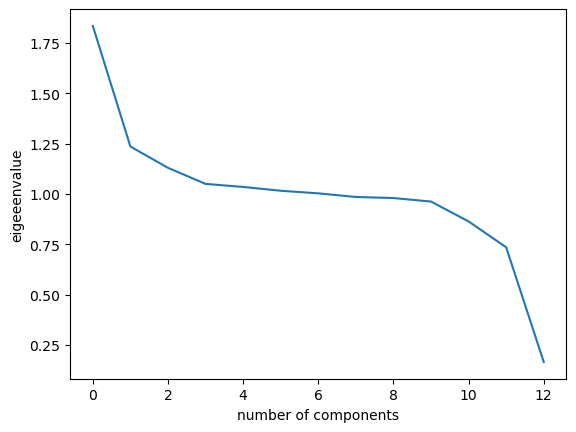

In [87]:
# Plotting scree plot with eigenvalues
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigeeenvalue')
plt.show()

In [88]:
# Outputting eigenvalues
eigenvalues

[1.8343474796820114,
 1.2357225003993333,
 1.129971453799735,
 1.050226762595568,
 1.0350832499605656,
 1.0162190601538652,
 1.0032302704771103,
 0.9852821155757643,
 0.9799687536405799,
 0.9625787063847092,
 0.8638801770396954,
 0.7356396931301525,
 0.16654977716115738]

## E3: Benefits of PCA

Using PCA allows the business to limit the number of variables being analyzed by grouping them into correlated variables that can provide similar insights when being analyzed. This will reduce redundancy in data analysis and make it easier to present findings to various stakeholders in the business based on the research question being looked at.
